In [2]:
#IMPORTAR LIBRERÍAS

#Advertencias
import warnings 
warnings.filterwarnings('ignore')

#Tratamiento de datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Preparación de datos
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config

#Modelado
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

#Búsqueda hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Evaluación
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [3]:
#IMPORTAR DATOS
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/SaratogaHouses.csv')
datos = pd.read_csv(url)
datos.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [4]:
datos.tail()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No
1727,111300,0.59,86,26000,1959,51,3,0,1.0,6,hot air,gas,septic,No,No,No


In [5]:
#EXPLORACIÓN DE DATOS
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


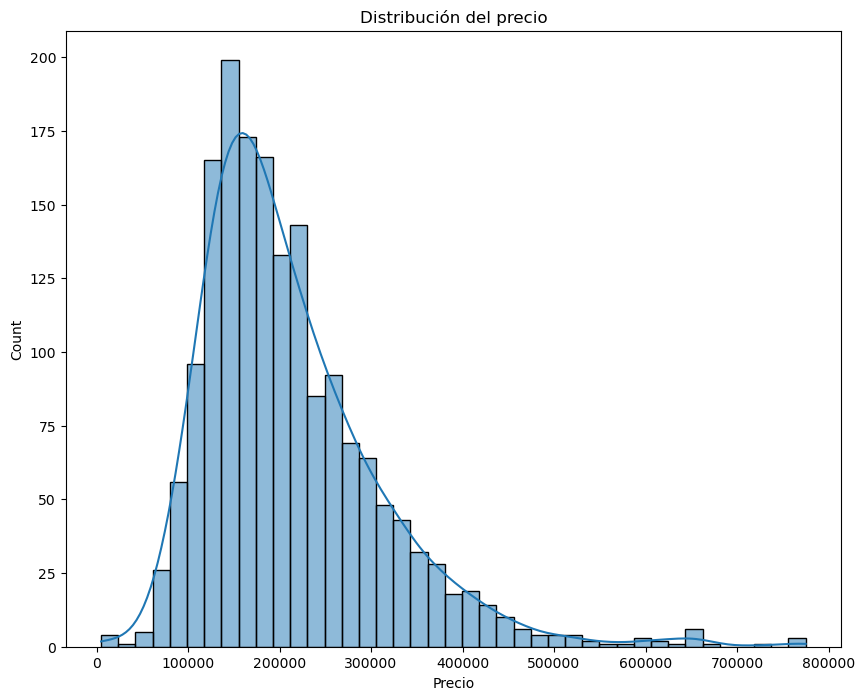

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sb.histplot(data = datos, x = 'price', kde = True, ax = ax)
ax.set_title('Distribución del precio')
ax.set_xlabel('Precio')
plt.show()

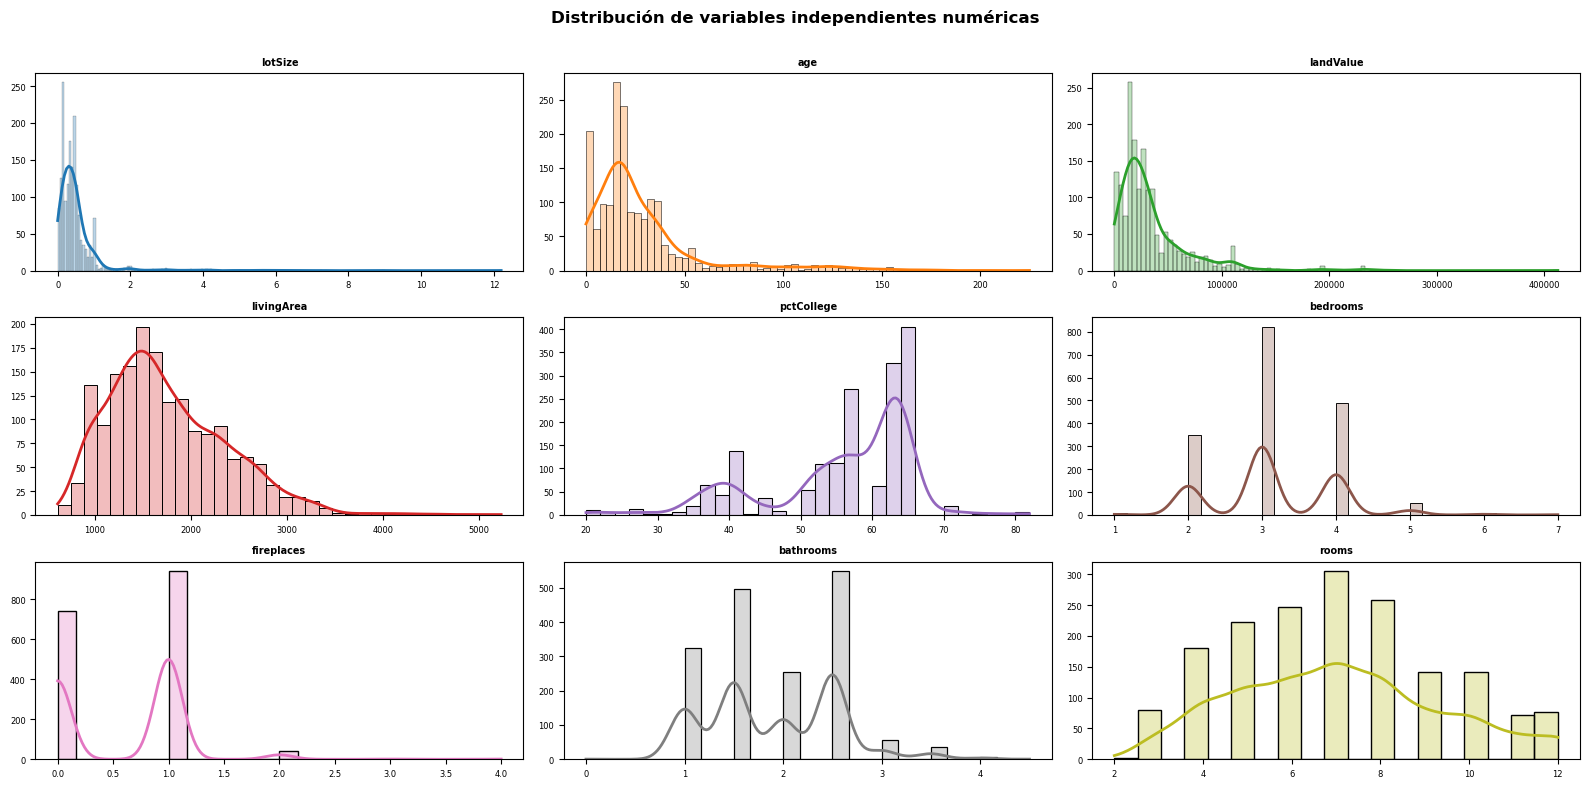

In [7]:
#Gráficos variables independientes numéricas
fig, ax = plt.subplots(3, 3, figsize = (16, 8))
ax = ax.flat
numCol = datos.select_dtypes(include = ['float64', 'int64']).columns
numCol = numCol.drop('price')

for i, col in enumerate (numCol):
    sb.histplot(data = datos,
               x = col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]['color'], 
                line_kws = {'linewidth':2},
               alpha = 0.3,
               ax = ax[i])
    ax[i].set_title(col, fontsize = 7, fontweight = 'bold')
    ax[i].tick_params(labelsize = 6)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de variables independientes numéricas', fontsize = 12, fontweight = 'bold')
plt.show()

In [8]:
datos.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


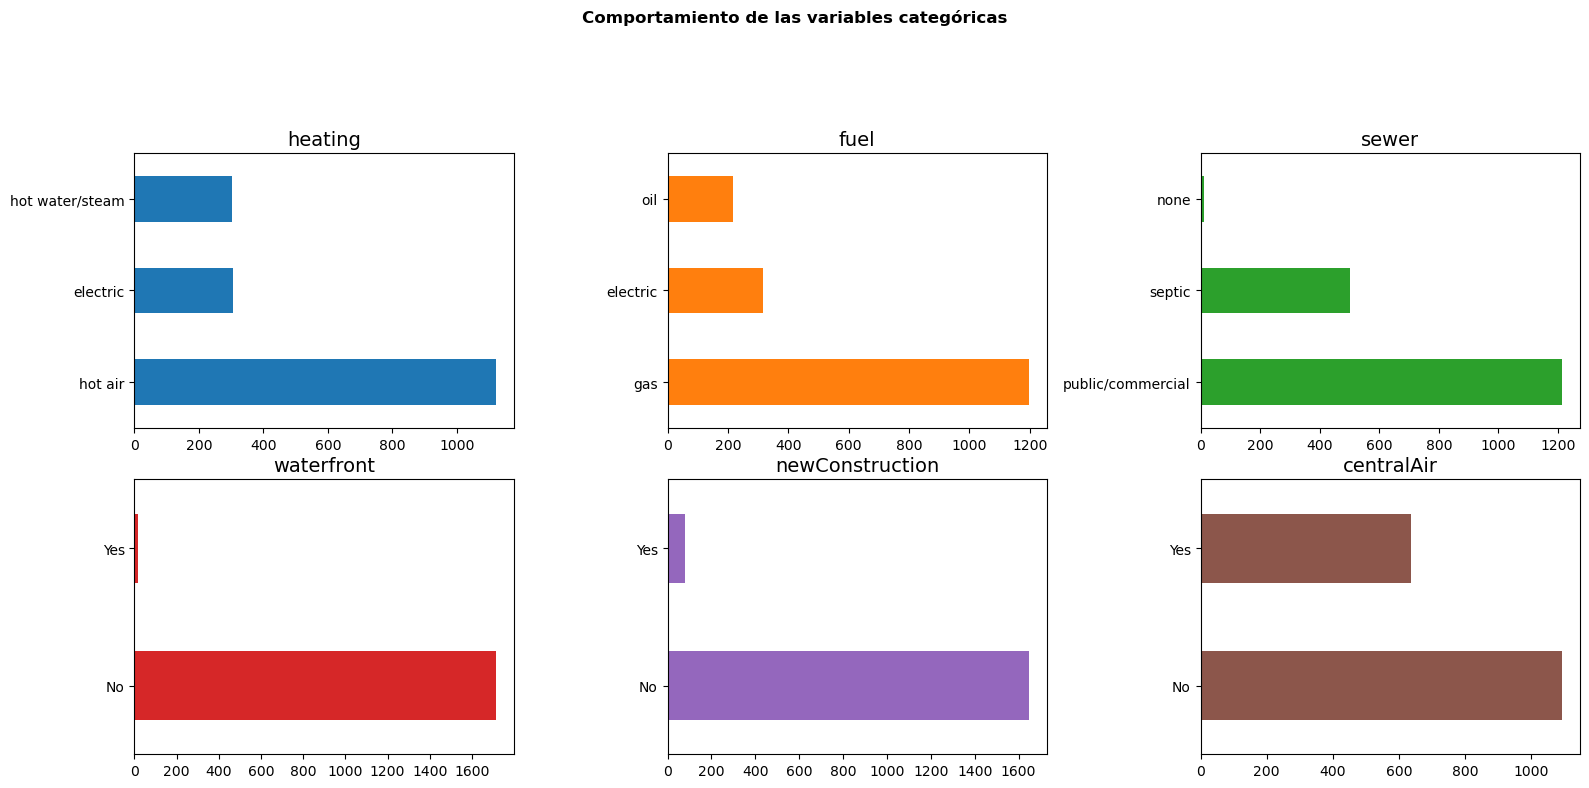

In [9]:
#Gráfico variables independientes categóricas
fig, ax = plt.subplots(2, 3, figsize = (16, 8))
ax = ax.flat
catCol = datos.select_dtypes(include = ['object']).columns

for i, col in enumerate(catCol):
    datos[col].value_counts().plot.barh(color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]['color'],
                                       ax = ax[i])
    ax[i].set_title(col, fontsize = 14)
    ax[i].set_xlabel('')
    
fig.tight_layout()
plt.subplots_adjust(top = 0.8)
fig.suptitle('Comportamiento de las variables categóricas', fontsize = 12, fontweight = 'bold')
plt.show()

In [10]:
datos.describe(include = 'object')

,heating,fuel,sewer,waterfront,newConstruction,centralAir
count,1728,1728,1728,1728,1728,1728
unique,3,3,3,2,2,2
top,hot air,gas,public/commercial,No,No,No
freq,1121,1197,1213,1713,1647,1093


In [11]:
#PREPARAR LOS DATOS
datos.drop(['waterfront', 'newConstruction', 'lotSize'], axis = 1, inplace = True)
datos.head()

,price,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,centralAir
0,132500,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No
1,181115,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No
2,109000,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No
3,155000,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No
4,86060,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,Yes


In [12]:
numCols = datos.select_dtypes(include = ['float64', 'int64']).columns.to_list()
catCols = datos.select_dtypes(include = ['object']).columns.to_list()

In [13]:
numTransformer = Pipeline(steps = [('scaler', StandardScaler())])
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [14]:
preprocesador = ColumnTransformer(transformers = [
    ('num', numTransformer, numCols),
    ('cat', catTransformer, catCols)
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['price', 'age', 'landValue', 'livingArea',
                                  'pctCollege', 'bedrooms', 'fireplaces',
                                  'bathrooms', 'rooms']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['heating', 'fuel', 'sewer', 'centralAir'])])

In [15]:
datosPre = preprocesador.fit_transform(datos)
datosPre

array([[-0.80748259,  0.4823004 ,  0.44108417, ...,  1.        ,
         1.        ,  0.        ],
       [-0.31349249, -0.95598015, -0.350095  , ...,  1.        ,
         1.        ,  0.        ],
       [-1.04627242,  3.59857493, -0.77853137, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.17341939, -0.64777718, -0.4043636 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.88369211,  0.68776905, -0.50718833, ...,  0.        ,
         1.        ,  0.        ],
       [-1.0229015 ,  1.9890705 , -0.24441402, ...,  1.        ,
         1.        ,  0.        ]])

In [16]:
codCat = preprocesador.named_transformers_['cat']['onehot'].get_feature_names(catCols)
codCat

array(['heating_electric', 'heating_hot air', 'heating_hot water/steam',
       'fuel_electric', 'fuel_gas', 'fuel_oil', 'sewer_none',
       'sewer_public/commercial', 'sewer_septic', 'centralAir_No',
       'centralAir_Yes'], dtype=object)

In [17]:
labels = np.concatenate([numCols, codCat])

In [18]:
datosPro = pd.DataFrame(datosPre, columns = labels)
datosPro.head()

,price,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating_electric,heating_hot air,heating_hot water/steam,fuel_electric,fuel_gas,fuel_oil,sewer_none,sewer_public/commercial,sewer_septic,centralAir_No,centralAir_Yes
0,-0.807483,0.482300,0.441084,-1.369854,-1.990952,-1.412915,0.716169,-1.367709,-0.881632,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.313492,-0.955980,-0.350095,0.319520,-0.442154,-0.189097,-1.082582,0.911366,-0.449812,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.046272,3.598575,-0.778531,0.304998,-0.442154,1.034721,0.716169,-1.367709,0.413827,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.578854,-0.510798,-0.452920,0.304998,-0.442154,-0.189097,0.716169,-0.608017,-0.881632,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.279372,-0.955980,-0.558601,-1.476348,-0.442154,-1.412915,-1.082582,-1.367709,-1.745271,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


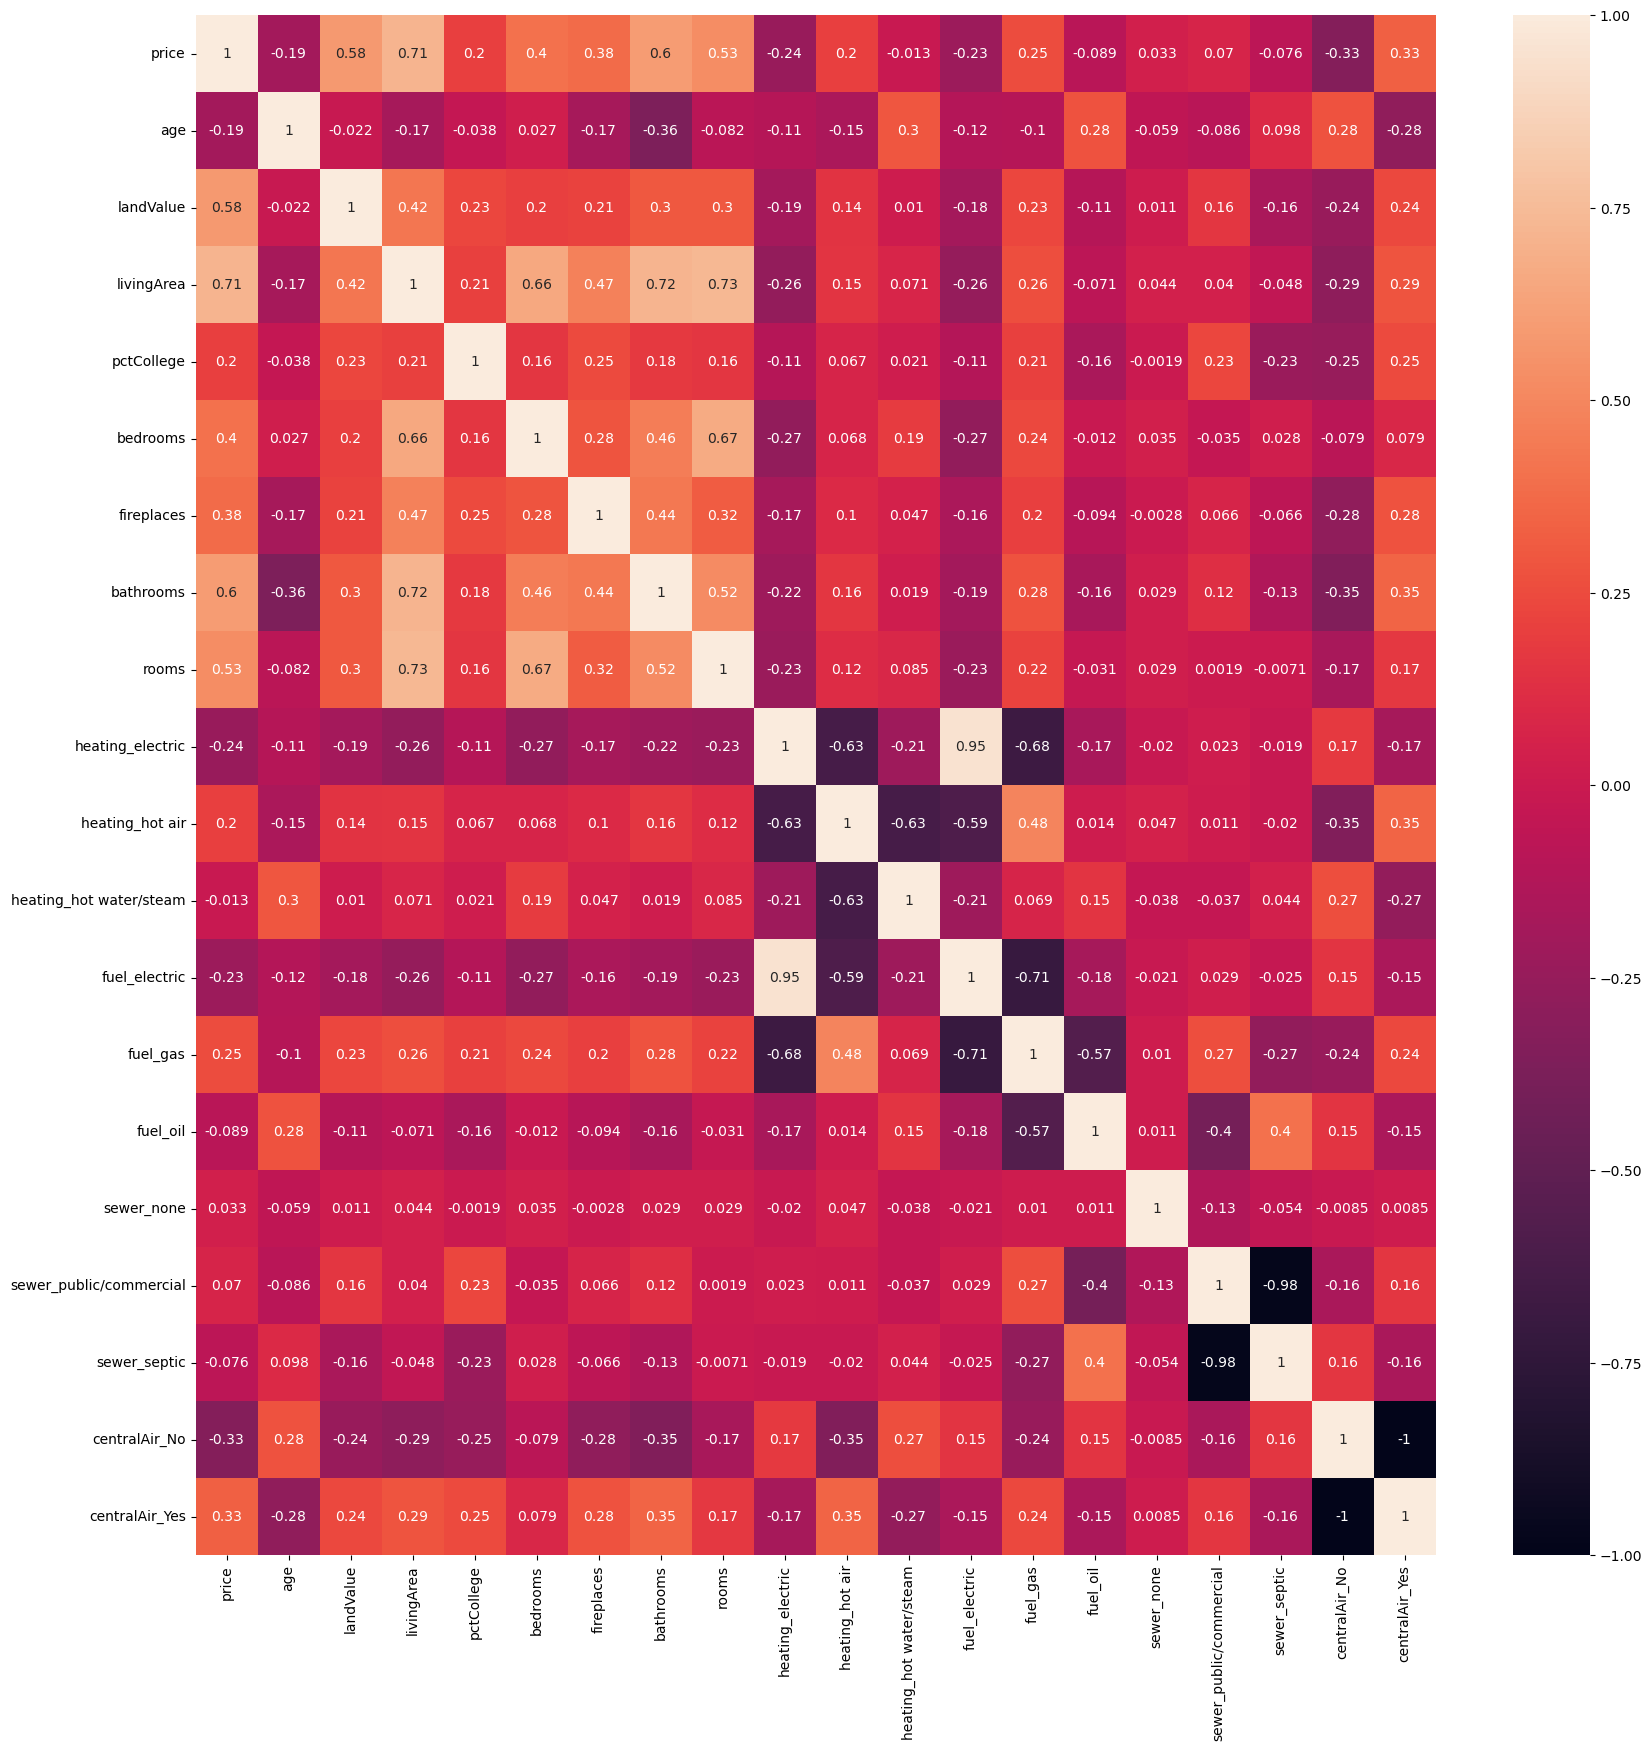

In [19]:
#Mapa de correlación
plt.figure(figsize = (20, 20))
sb.heatmap(datosPro.corr(), annot = True)
plt.show()

In [20]:
#Separación de X con y
x = datosPro.drop('price', axis = 1)
y = datosPro['price']

In [21]:
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(x, y, train_size = 0.7, random_state = 123)

In [22]:
#Modelo de Regresión Lineal
modelo1 = LinearRegression()
modelo1.fit(xEntrenamiento, yEntrenamiento)

LinearRegression()

In [23]:
modelo1.coef_

array([-0.0219405 ,  0.28125566,  0.48222355,  0.00332805, -0.0966973 ,
        0.02854337,  0.12607405,  0.07339535, -0.04216929,  0.04954579,
       -0.0073765 ,  0.03029244, -0.01486123, -0.01543121, -0.0951819 ,
        0.01539795,  0.07978396, -0.06349375,  0.06349375])

In [24]:
modelo1.intercept_

-0.05287128224048236

In [27]:
#Métricas de desempeño
pred1Entrenamiento = modelo1.predict(xEntrenamiento)
pred1Prueba = modelo1.predict(xPrueba)

r21Entrenamiento = r2_score(yEntrenamiento, pred1Entrenamiento)
rmse1Entrenamiento = mean_squared_error(yEntrenamiento, pred1Entrenamiento, squared = False)
mae1Entrenamiento = mean_absolute_error(yEntrenamiento, pred1Entrenamiento)
mape1Entrenamiento = mean_absolute_percentage_error(yEntrenamiento, pred1Entrenamiento)
print(f'Las métricas de Entrenamiento para la Regresión Lineal son: \nR2: {r21Entrenamiento}' + f'\nRMSE: {rmse1Entrenamiento}\nMAE: {mae1Entrenamiento}\nMAPE: {mape1Entrenamiento}')

Las métricas de Entrenamiento para la Regresión Lineal son: 
R2: 0.6518729782422166
RMSE: 0.5827097837763374
MAE: 0.4283613505495987
MAPE: 5.629697031636998


In [28]:
r21Prueba = r2_score(yPrueba, pred1Prueba)
rmse1Prueba = mean_squared_error(yPrueba, pred1Prueba, squared = False)
mae1Prueba = mean_absolute_error(yPrueba, pred1Prueba)
mape1Prueba = mean_absolute_percentage_error(yPrueba, pred1Prueba)
print(f'Las métricas de Entrenamiento para la Regresión Lineal son: \nR2: {r21Prueba}' + f'\nRMSE: {rmse1Prueba}\nMAE: {mae1Prueba}\nMAPE: {mape1Prueba}')

Las métricas de Entrenamiento para la Regresión Lineal son: 
R2: 0.5716913294201622
RMSE: 0.6729042922619222
MAE: 0.43957005103237434
MAPE: 7.825135056962083


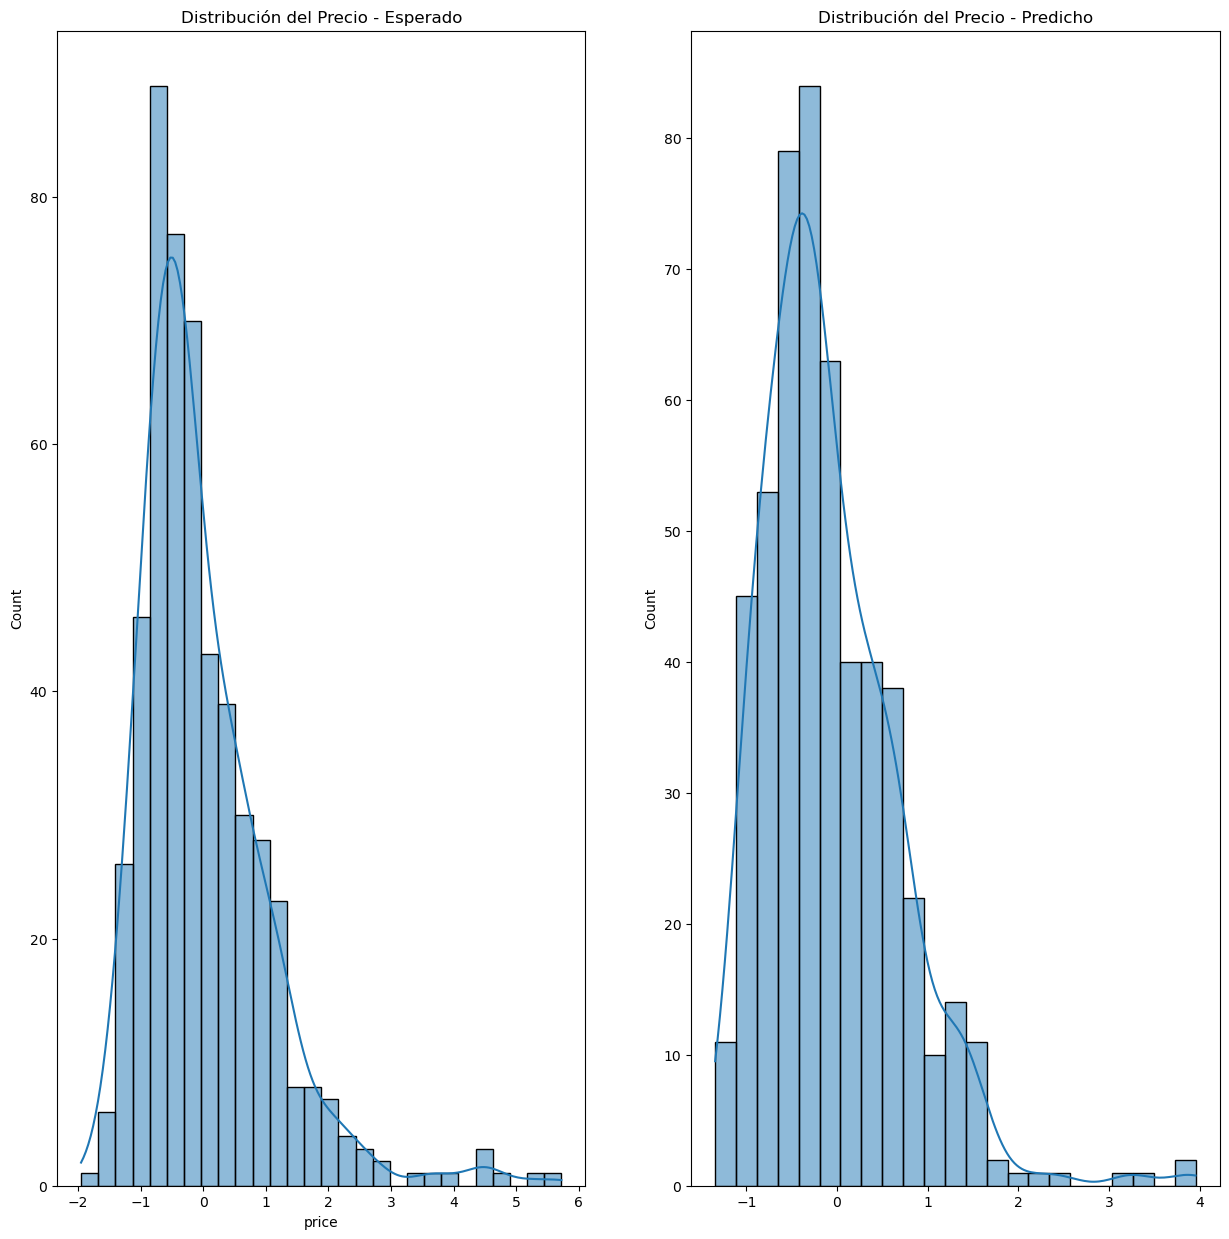

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
sb.histplot(yPrueba, kde = True, ax = ax[0])
ax[0].set_title('Distribución del Precio - Esperado')
ax[0].set_label('Precio')

sb.histplot(pred1Prueba, kde = True, ax = ax[1])
ax[1].set_title('Distribución del Precio - Predicho')
ax[1].set_label('Precio')
plt.show()

In [30]:
mediaPrecio = datos['price'].mean()
desviacionPrecio = datos['price'].std()

In [31]:
yPruebaReal = (yPrueba * desviacionPrecio) + mediaPrecio
pred1PruebaReal = (pred1Prueba * desviacionPrecio) + mediaPrecio

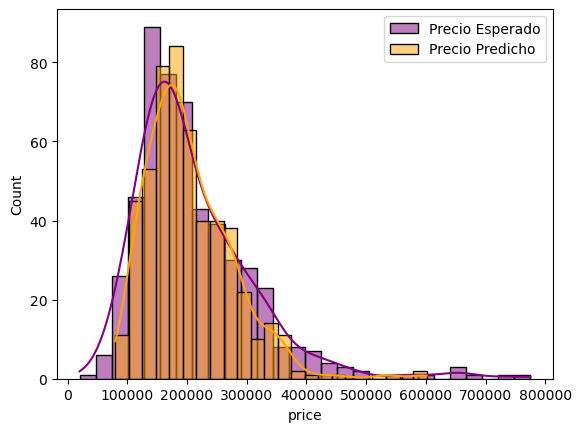

In [54]:
sb.histplot(yPruebaReal, kde = True, color = 'purple', label = 'Precio Esperado')
sb.histplot(pred1PruebaReal, kde = True, color = 'orange', label = 'Precio Predicho')
plt.legend()
plt.show()

In [44]:
#Modelo Árbol de Decisión
modelo2 = DecisionTreeRegressor()
modelo2.fit(xEntrenamiento, yEntrenamiento)

DecisionTreeRegressor()

Profundidad del árbol: 22
Número de hojas: 1172


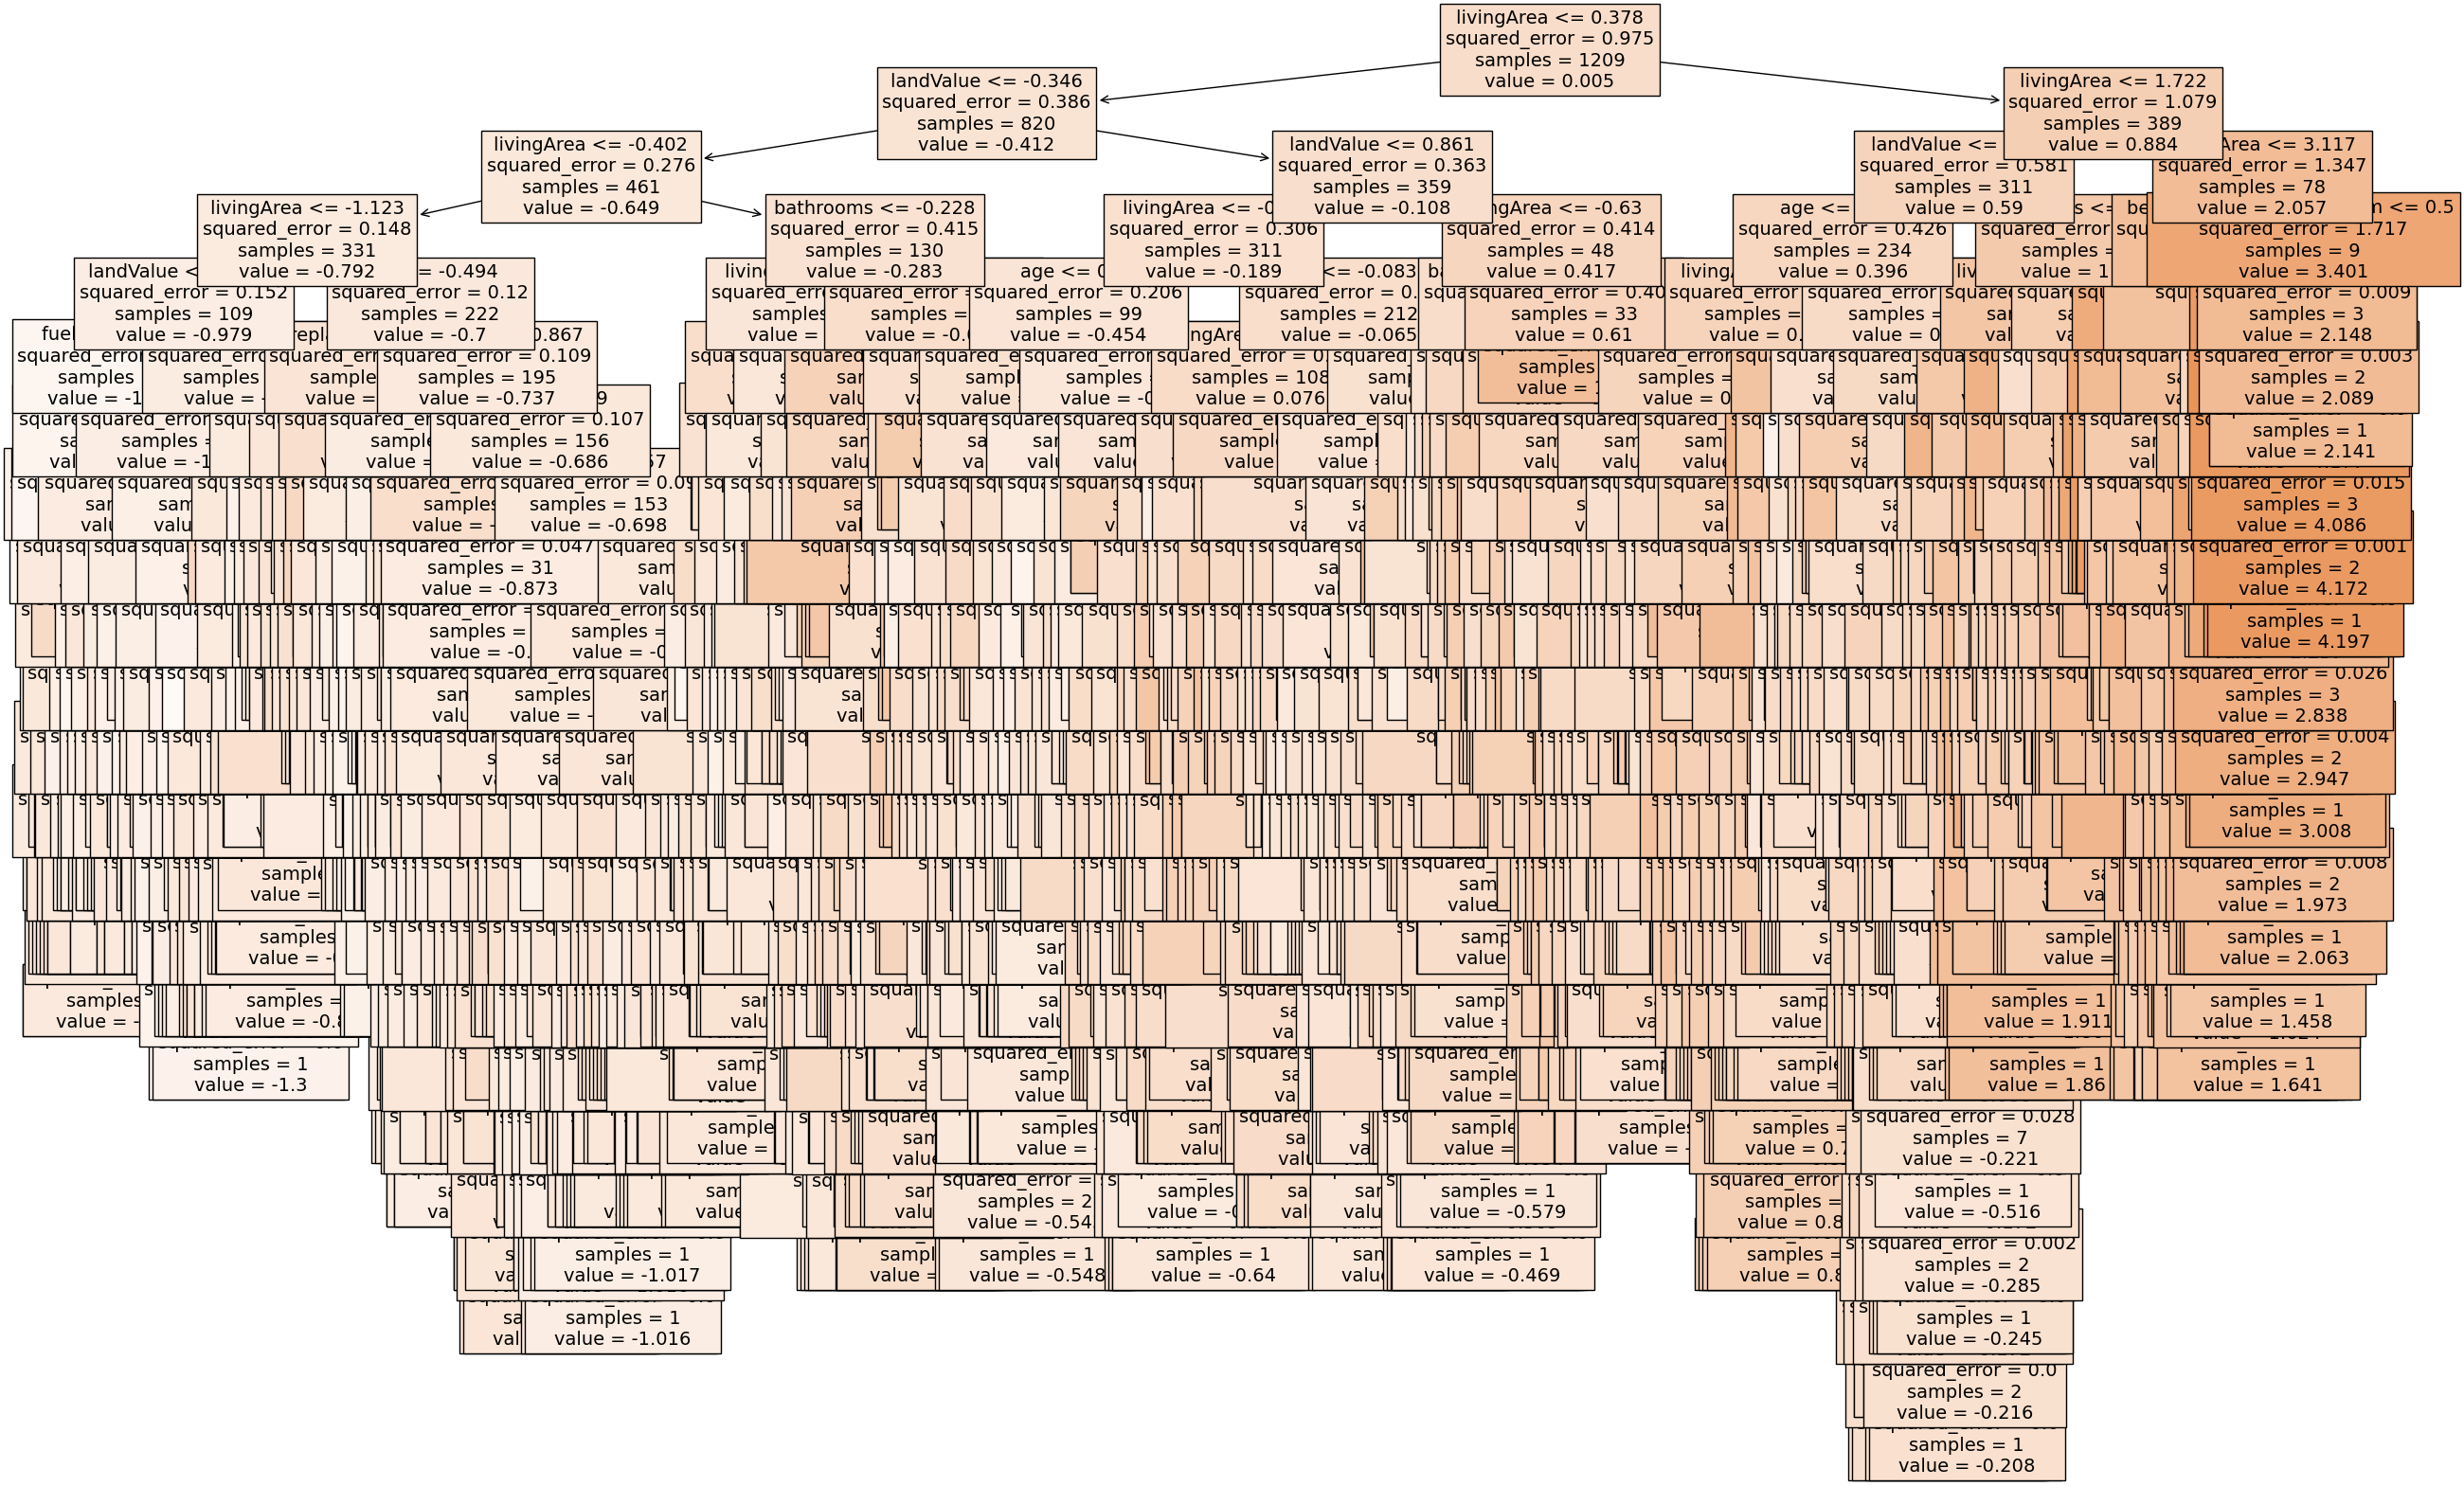

In [45]:
fig, ax = plt.subplots(figsize = (30, 20))
print(f'Profundidad del árbol: {modelo2.get_depth()}')
print(f'Número de hojas: {modelo2.get_n_leaves()}')
plot = plot_tree(decision_tree = modelo2,
                feature_names = xEntrenamiento.columns.to_list(),
                filled = True,
                fontsize = 14, ax = ax)
plt.show()

In [46]:
#Métricas de desempeño
pred2Entrenamiento = modelo2.predict(xEntrenamiento)
pred2Prueba = modelo2.predict(xPrueba)

r22Entrenamiento = r2_score(yEntrenamiento, pred2Entrenamiento)
rmse2Entrenamiento = mean_squared_error(yEntrenamiento, pred2Entrenamiento, squared = False)
mae2Entrenamiento = mean_absolute_error(yEntrenamiento, pred2Entrenamiento)
mape2Entrenamiento = mean_absolute_percentage_error(yEntrenamiento, pred2Entrenamiento)
print(f'Las métricas de Entrenamiento para la Regresión Lineal son: \nR2: {r22Entrenamiento}' + f'\nRMSE: {rmse2Entrenamiento}\nMAE: {mae2Entrenamiento}\nMAPE: {mape2Entrenamiento}')

Las métricas de Entrenamiento para la Regresión Lineal son: 
R2: 1.0
RMSE: 0.0
MAE: 0.0
MAPE: 0.0


In [47]:
r22Prueba = r2_score(yPrueba, pred2Prueba)
rmse2Prueba = mean_squared_error(yPrueba, pred2Prueba, squared = False)
mae2Prueba = mean_absolute_error(yPrueba, pred2Prueba)
mape2Prueba = mean_absolute_percentage_error(yPrueba, pred2Prueba)
print(f'Las métricas de Entrenamiento para la Regresión Lineal son: \nR2: {r22Prueba}' + f'\nRMSE: {rmse2Prueba}\nMAE: {mae2Prueba}\nMAPE: {mape2Prueba}')

Las métricas de Entrenamiento para la Regresión Lineal son: 
R2: 0.30930223826273573
RMSE: 0.854513424158245
MAE: 0.5564539120586305
MAPE: 6.199377026984337


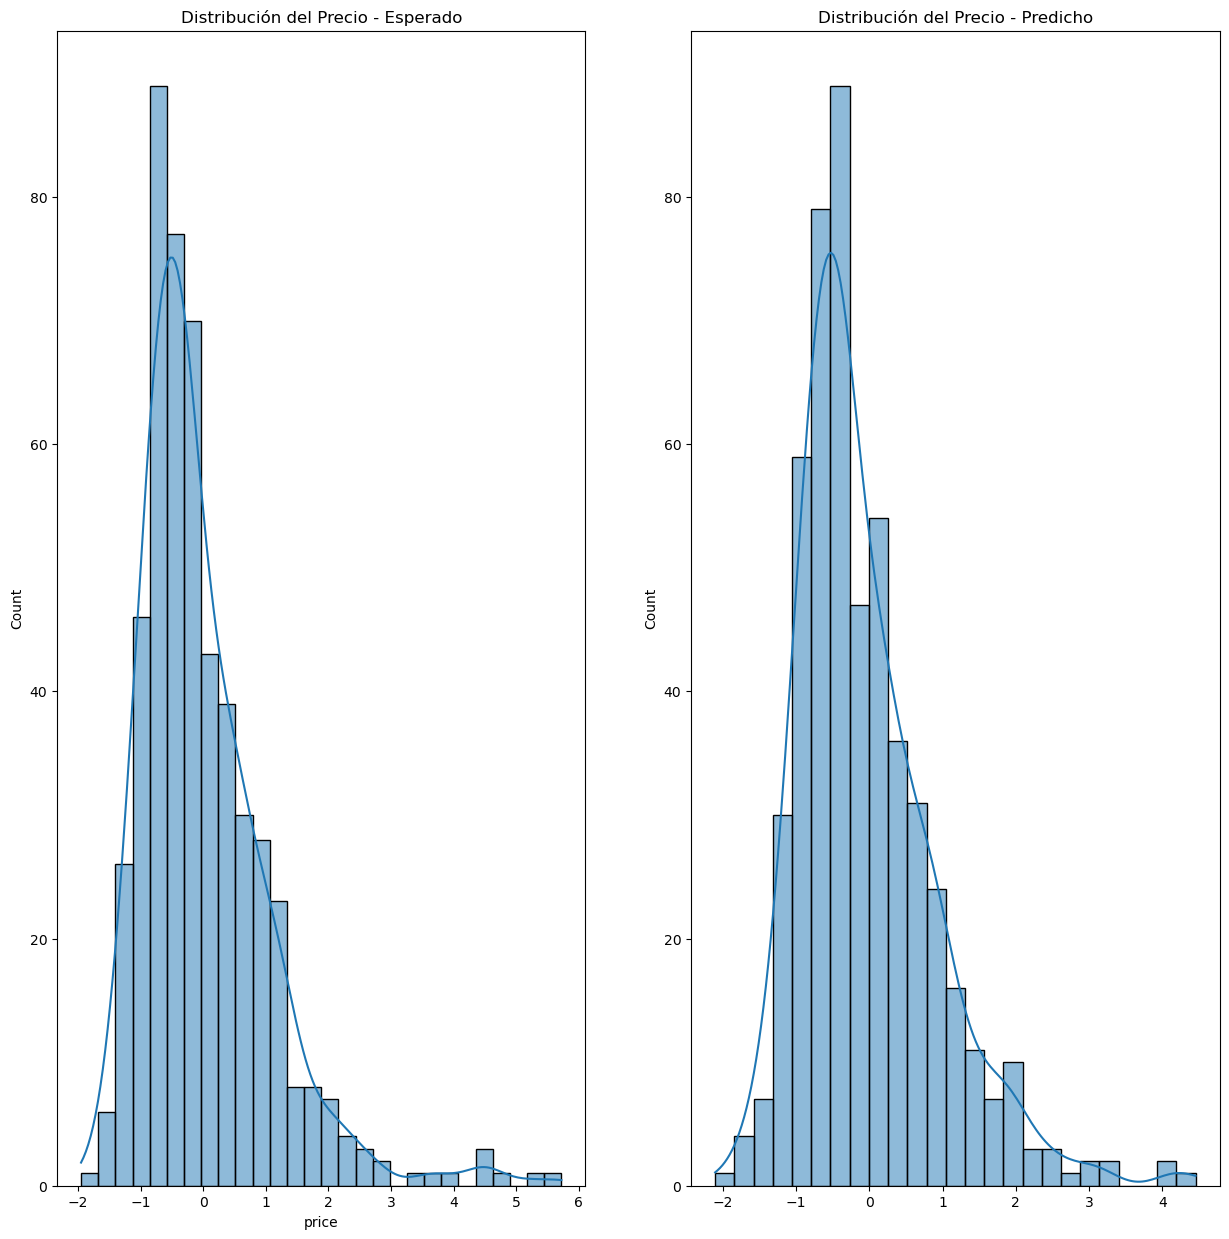

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
sb.histplot(yPrueba, kde = True, ax = ax[0])
ax[0].set_title('Distribución del Precio - Esperado')
ax[0].set_label('Precio')

sb.histplot(pred2Prueba, kde = True, ax = ax[1])
ax[1].set_title('Distribución del Precio - Predicho')
ax[1].set_label('Precio')
plt.show()

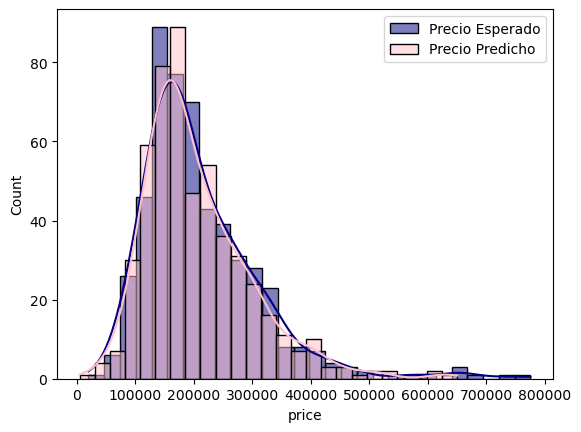

In [52]:
pred2PruebaReal = (pred2Prueba * desviacionPrecio) + mediaPrecio

sb.histplot(yPruebaReal, kde = True, color = 'navy', label = 'Precio Esperado')
sb.histplot(pred2PruebaReal, kde = True, color = 'pink', label = 'Precio Predicho')
plt.legend()
plt.show()

In [55]:
#Búsqueda de hiperparámetros
#Exhaustiva
gridParams = {'max_depth': [3, 5, 8, 10, 15, 20],
             'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
             'min_samples_split': [4, 3, 2, 1]}

regresor = GridSearchCV(modelo2, param_grid = gridParams, cv = 5)
regresor.fit(xEntrenamiento, yEntrenamiento)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson', 'friedman_mse'],
                         'max_depth': [3, 5, 8, 10, 15, 20],
                         'min_samples_split': [4, 3, 2, 1]})

In [56]:
validacion = pd.concat([pd.DataFrame(regresor.cv_results_['params']),
                       pd.DataFrame(regresor.cv_results_['mean_test_score'], 
                                   columns = ['R2'])], axis = 1)
validacion.sort_values('R2', ascending = False)

,criterion,max_depth,min_samples_split,R2
29,absolute_error,5,3,0.587736
30,absolute_error,5,2,0.587016
28,absolute_error,5,4,0.586701
1,squared_error,3,3,0.563422
2,squared_error,3,2,0.563422
...,...,...,...,...
79,friedman_mse,5,1,NaN
83,friedman_mse,8,1,NaN
87,friedman_mse,10,1,NaN
91,friedman_mse,15,1,NaN


In [60]:
#Aleatorizada
regresorAleatorizada = RandomizedSearchCV(modelo2, cv = 5, 
                                         param_distributions = gridParams,
                                         n_iter = 15)
regresorAleatorizada.fit(xEntrenamiento, yEntrenamiento)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=15,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [3, 5, 8, 10, 15, 20],
                                        'min_samples_split': [4, 3, 2, 1]})

In [61]:
regresorAleatorizada = pd.concat([pd.DataFrame(regresorAleatorizada.cv_results_['params']),
                       pd.DataFrame(regresorAleatorizada.cv_results_['mean_test_score'], 
                                   columns = ['R2'])], axis = 1)

regresorAleatorizada.sort_values('R2', ascending = False)

,min_samples_split,max_depth,criterion,R2
4,2,3,squared_error,0.563422
13,4,5,friedman_mse,0.551637
6,2,5,squared_error,0.551418
5,4,5,squared_error,0.550834
7,3,3,absolute_error,0.549434
9,2,8,squared_error,0.531339
11,4,8,squared_error,0.519310
2,3,20,squared_error,0.423091
1,3,15,squared_error,0.422331
12,2,20,absolute_error,0.384993
